In [1]:
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import missingno as msno
import numpy as np # linear algebra
import os
import random
import sys

In [2]:
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.family'] = 'Malgun Gothic'

In [3]:
## 데이터 불러오기
med19 = pd.read_csv('./Medical_Check_2019.csv')
med19 = med19.drop(['결손치 유무', '치아마모증유무', '제3대구치(사랑니) 이상'], axis=1)

med18 = pd.read_csv('./Medical_Check_2018.csv')
med18 = med18.drop(['결손치유무', '치아마모증유무', '제3대구치(사랑니)이상'], axis=1)

med17 = pd.read_csv('./Medical_Check_2017.csv')
med17 = med17.drop(['결손치유무', '치아마모증유무', '제3대구치(사랑니)이상'], axis=1)

med16 = pd.read_csv('./Medical_Check_2016.csv')
# med16 = med16.drop(['결손치유무', '치아마모증유무', '제3대구치(사랑니)이상'], axis=1)

In [4]:
## 19년도 컬럼 재배치
med19 = med19.loc[:, ['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', 
                      '시도코드', '신장(5Cm단위)', '체중(5Kg단위)', '허리둘레', 
                      '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
                      '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 
                      'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '요단백', '혈청크레아티닌', 
                      '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태', 
                      '음주여부', '구강검진 수검여부', '치아우식증유무', '치석', '데이터 공개일자']]
med19.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '치석', '데이터 공개일자'],
      dtype='object')

In [5]:
## 시도코드 변환
med19['시도코드'] = med19['시도코드'].map({11: '서울특별시', 41: '경기도', 42: '강원도', 26: '부산광역시', 27: '대구광역시', 28: '인천광역시',
                                 29: '광주광역시', 30: '대전광역시', 31: '울산광역시', 36: '세종시', 
                                 43: '충청북도', 44: '충청남도', 45: '전라북도', 46: '전라남도', 47: '경상북도', 48: '경상남도', 50: '제주도'})
med18['시도코드'] = med18['시도코드'].map({11: '서울특별시', 41: '경기도', 42: '강원도', 26: '부산광역시', 27: '대구광역시', 28: '인천광역시',
                                 29: '광주광역시', 30: '대전광역시', 31: '울산광역시', 36: '세종시', 
                                 43: '충청북도', 44: '충청남도', 45: '전라북도', 46: '전라남도', 47: '경상북도', 48: '경상남도', 50: '제주도'})
med17['시도코드'] = med17['시도코드'].map({11: '서울특별시', 41: '경기도', 42: '강원도', 26: '부산광역시', 27: '대구광역시', 28: '인천광역시',
                                 29: '광주광역시', 30: '대전광역시', 31: '울산광역시', 36: '세종시', 
                                 43: '충청북도', 44: '충청남도', 45: '전라북도', 46: '전라남도', 47: '경상북도', 48: '경상남도', 49: '제주도'})
med16['시도코드'] = med16['시도코드'].map({11: '서울특별시', 41: '경기도', 42: '강원도', 26: '부산광역시', 27: '대구광역시', 28: '인천광역시',
                                 29: '광주광역시', 30: '대전광역시', 31: '울산광역시', 36: '세종시', 
                                 43: '충청북도', 44: '충청남도', 45: '전라북도', 46: '전라남도', 47: '경상북도', 48: '경상남도', 49: '제주도'})

In [6]:
## 데이터 합치기
med_total = pd.concat([med19, med18, med17, med16], ignore_index=True)
med_total.shape

(4000000, 31)

In [7]:
## 4개 항목 제거
med_total = med_total.drop(['가입자일련번호','치아우식증유무',
                            '치석', '데이터 공개일자'], axis=1)
## 결측치 제거
med_total_1 = med_total.dropna()

In [8]:
sido = []

sido_list = list(med_total_1.value_counts(['시도코드']).index)
for one in sido_list:
    sido.append(one[0])

sido_1 = list(med_total_1.value_counts(['시도코드']).values)

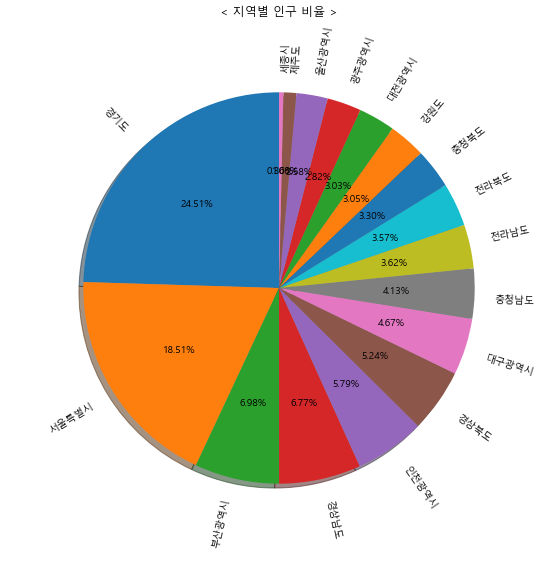

None


In [9]:
sido_val = np.array(med_total_1.value_counts(['시도코드']).sort_index())
plt.figure(figsize=(15, 10), facecolor='white')
plt.pie(sido_1, radius=0.9, shadow=True, labels=sido, autopct='%.2f%%', startangle=90, rotatelabels=True)
plt.title('< 지역별 인구 비율 >', x=0.5, y=0.99)
print(plt.show())

In [10]:
med_total_4 = med_total_1.copy()

med_total_4['연령대코드(5세단위)'] = med_total_4['연령대코드(5세단위)'].map({5: '20~24세', 6: '25~29세', 7: '30~34세', 8: '35~39세', 
                                                                         9: '40~44세', 10: '45~49세', 11: '50~54세', 12: '55~59세', 
                                                             13: '60~64세', 14: '65~69세', 15: '70~74세', 16: '75~79세', 17: '80~84세', 18: '85세+',})

med_total_4['연령대코드(5세단위)'].value_counts()
pop_count = med_total_4.groupby(['시도코드', '연령대코드(5세단위)'])['기준년도'].count()

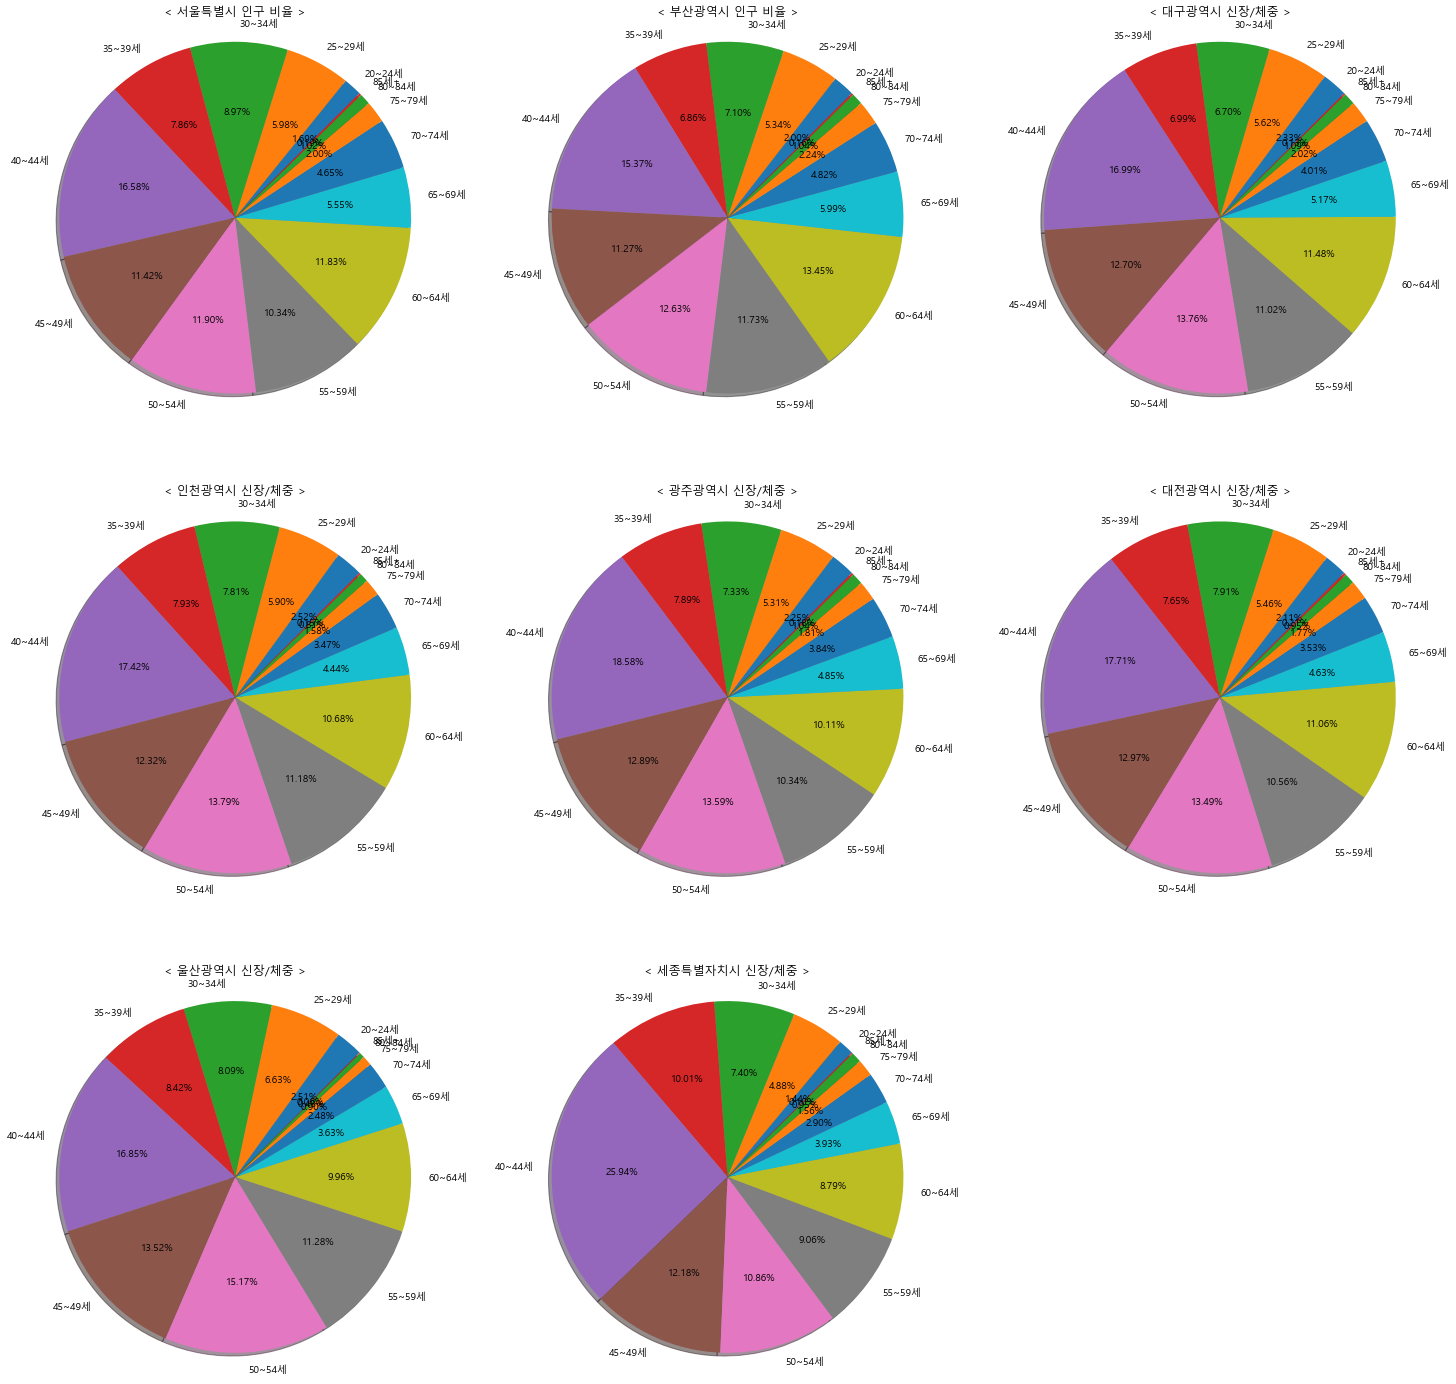

In [11]:
### 지역별 pieplot 지역별 연령대 인구비율

plt.figure(figsize=(25,25), facecolor='white')
plt.subplot(331)
plt.pie(pop_count['서울특별시'], labels=pop_count['서울특별시'].index, radius=1.1, shadow=True, autopct='%.2f%%', startangle=45)
plt.title('< 서울특별시 인구 비율 >', x=0.5, y=0.99)

plt.subplot(332)
plt.pie(pop_count['부산광역시'], labels=pop_count['부산광역시'].index, radius=1.1, shadow=True, autopct='%.2f%%', startangle=45)
plt.title('< 부산광역시 인구 비율 >', x=0.5, y=0.99)

plt.subplot(333)
plt.pie(pop_count['대구광역시'], labels=pop_count['대구광역시'].index, radius=1.1, shadow=True, autopct='%.2f%%', startangle=45)
plt.title('< 대구광역시 신장/체중 >', x=0.5, y=0.99)

plt.subplot(334)
plt.pie(pop_count['인천광역시'], labels=pop_count['인천광역시'].index, radius=1.1, shadow=True, autopct='%.2f%%', startangle=45)
plt.title('< 인천광역시 신장/체중 >', x=0.5, y=0.99)

plt.subplot(335)
plt.pie(pop_count['광주광역시'], labels=pop_count['광주광역시'].index, radius=1.1, shadow=True, autopct='%.2f%%', startangle=45)
plt.title('< 광주광역시 신장/체중 >', x=0.5, y=0.99)

plt.subplot(336)
plt.pie(pop_count['대전광역시'], labels=pop_count['대전광역시'].index, radius=1.1, shadow=True, autopct='%.2f%%', startangle=45)
plt.title('< 대전광역시 신장/체중 >', x=0.5, y=0.99)

plt.subplot(337)
plt.pie(pop_count['울산광역시'], labels=pop_count['울산광역시'].index, radius=1.1, shadow=True, autopct='%.2f%%', startangle=45)
plt.title('< 울산광역시 신장/체중 >', x=0.5, y=0.99)

plt.subplot(338)
plt.pie(pop_count['세종시'], labels=pop_count['세종시'].index, radius=1.1, shadow=True, autopct='%.2f%%', startangle=45)
plt.title('< 세종특별자치시 신장/체중 >', x=0.5, y=0.99)

plt.show()

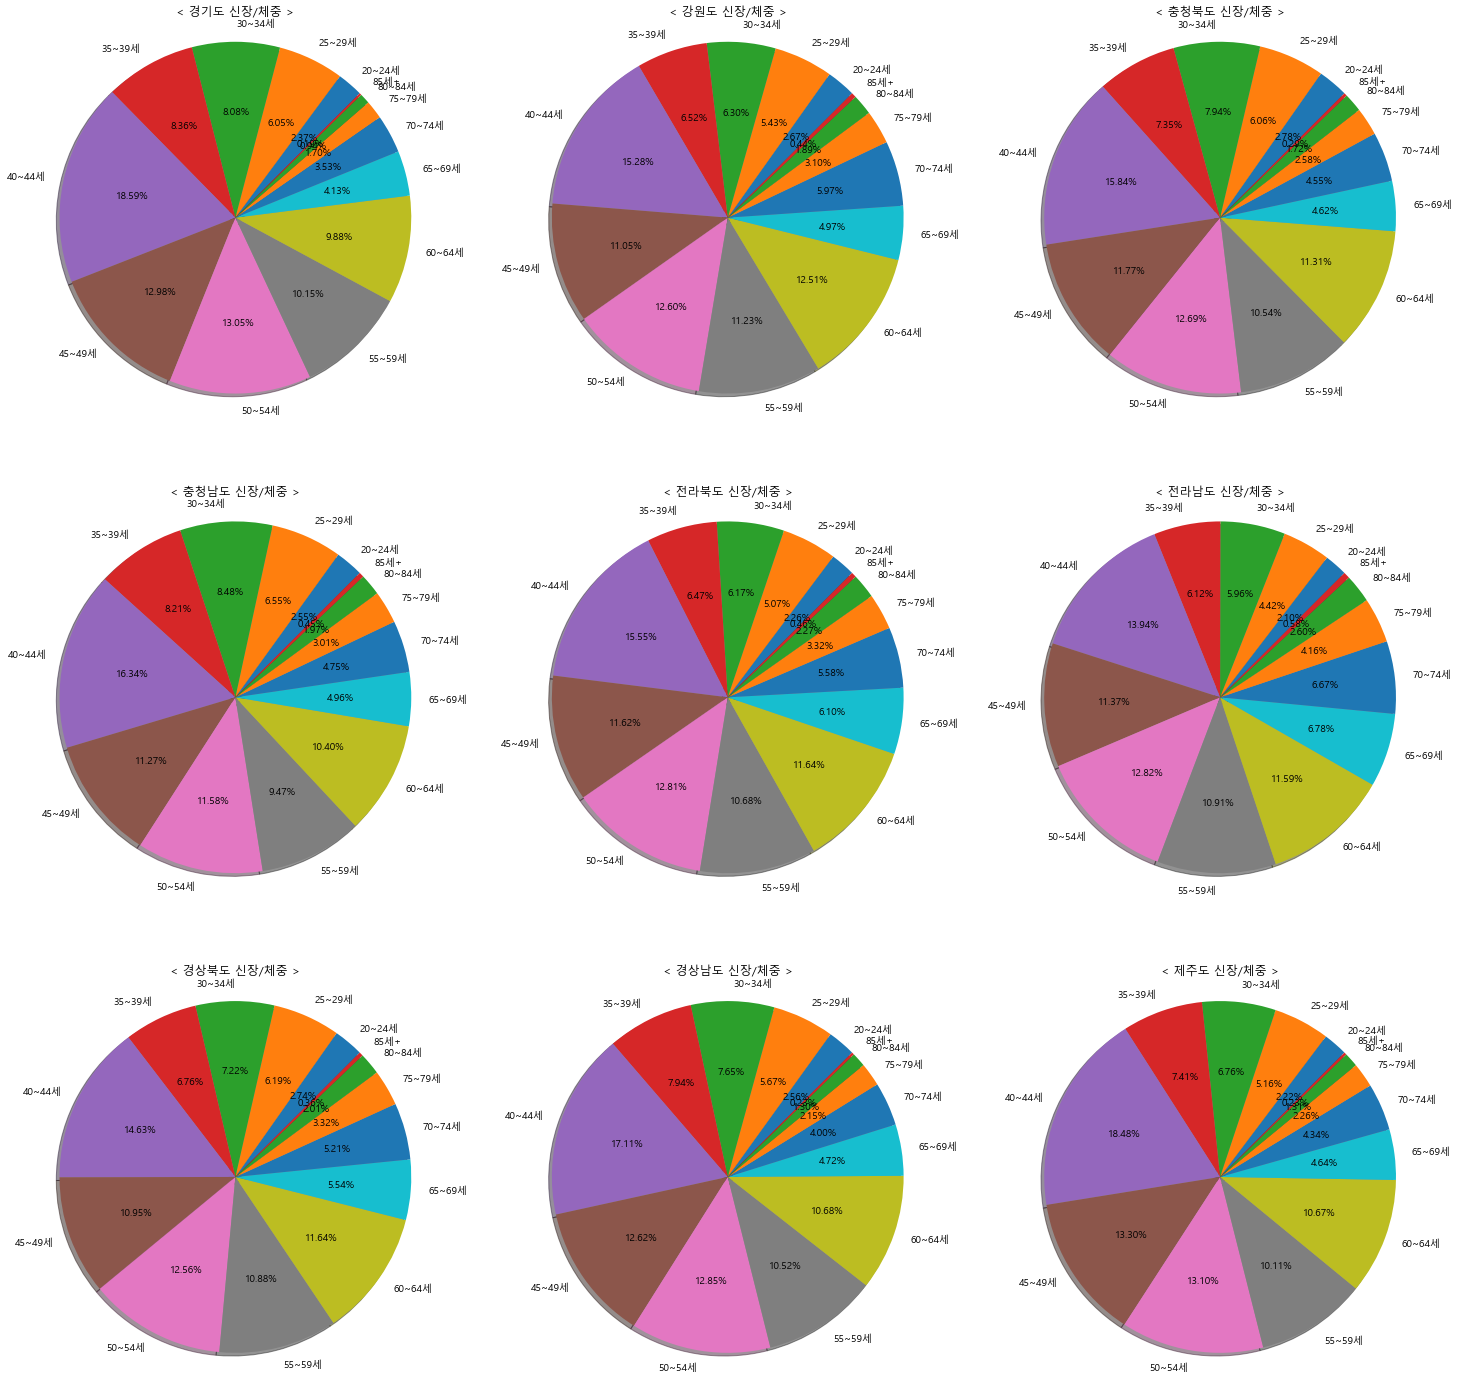

In [12]:
### 지역별 pieplot 지역별 연령대 인구비율

plt.figure(figsize=(25,25), facecolor='white')

plt.subplot(331)
plt.pie(pop_count['경기도'], labels=pop_count['경기도'].index, radius=1.1, shadow=True, autopct='%.2f%%', startangle=45)
plt.title('< 경기도 신장/체중 >', x=0.5, y=0.99)

plt.subplot(332)
plt.pie(pop_count['강원도'], labels=pop_count['강원도'].index, radius=1.1, shadow=True, autopct='%.2f%%', startangle=45)
plt.title('< 강원도 신장/체중 >', x=0.5, y=0.99)

plt.subplot(333)
plt.pie(pop_count['충청북도'], labels=pop_count['충청북도'].index, radius=1.1, shadow=True, autopct='%.2f%%', startangle=45)
plt.title('< 충청북도 신장/체중 >', x=0.5, y=0.99)

plt.subplot(334)
plt.pie(pop_count['충청남도'], labels=pop_count['충청남도'].index, radius=1.1, shadow=True, autopct='%.2f%%', startangle=45)
plt.title('< 충청남도 신장/체중 >', x=0.5, y=0.99)

plt.subplot(335)
plt.pie(pop_count['전라북도'], labels=pop_count['전라북도'].index, radius=1.1, shadow=True, autopct='%.2f%%', startangle=45)
plt.title('< 전라북도 신장/체중 >', x=0.5, y=0.99)

plt.subplot(336)
plt.pie(pop_count['전라남도'], labels=pop_count['전라남도'].index, radius=1.1, shadow=True, autopct='%.2f%%', startangle=45)
plt.title('< 전라남도 신장/체중 >', x=0.5, y=0.99)

plt.subplot(337)
plt.pie(pop_count['경상북도'], labels=pop_count['경상북도'].index, radius=1.1, shadow=True, autopct='%.2f%%', startangle=45)
plt.title('< 경상북도 신장/체중 >', x=0.5, y=0.99)

plt.subplot(338)
plt.pie(pop_count['경상남도'], labels=pop_count['경상남도'].index, radius=1.1, shadow=True, autopct='%.2f%%', startangle=45)
plt.title('< 경상남도 신장/체중 >', x=0.5, y=0.99)

plt.subplot(339)
plt.pie(pop_count['제주도'], labels=pop_count['제주도'].index, radius=1.1, shadow=True, autopct='%.2f%%', startangle=45)
plt.title('< 제주도 신장/체중 >', x=0.5, y=0.99)

plt.show()

Text(0.5, 0.99, '< 서울특별시 인구 비율 >')

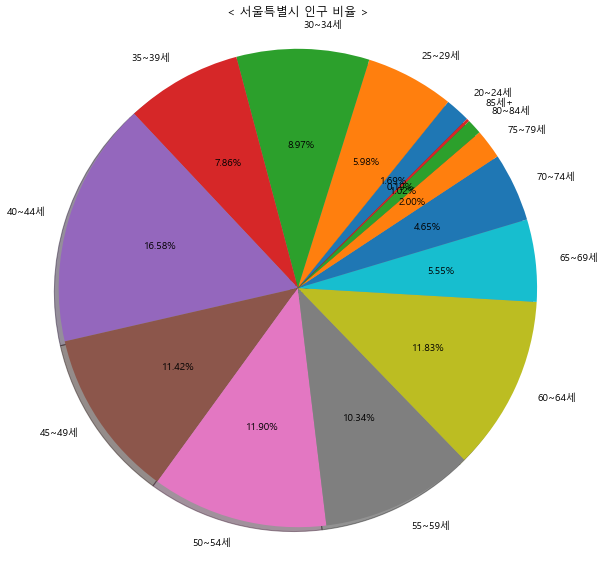

In [13]:
plt.figure(figsize=(15, 10), facecolor='white')
plt.pie(pop_count['서울특별시'], labels=pop_count['서울특별시'].index, radius=1.1, shadow=True, autopct='%.2f%%', startangle=45)
plt.title('< 서울특별시 인구 비율 >', x=0.5, y=0.99)

Text(0.5, 0.99, '< 부산광역시 인구 비율 >')

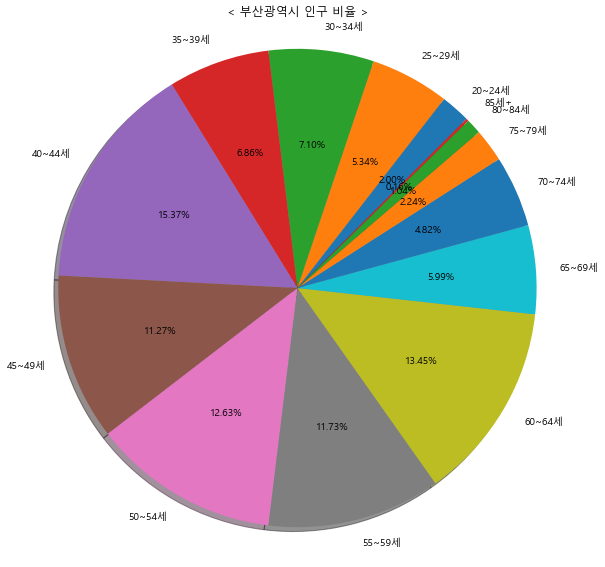

In [14]:
plt.figure(figsize=(15, 10), facecolor='white')
plt.pie(pop_count['부산광역시'], labels=pop_count['부산광역시'].index, radius=1.1, shadow=True, autopct='%.2f%%', startangle=45)
plt.title('< 부산광역시 인구 비율 >', x=0.5, y=0.99)

Text(0.5, 0.99, '< 대구광역시 신장/체중 >')

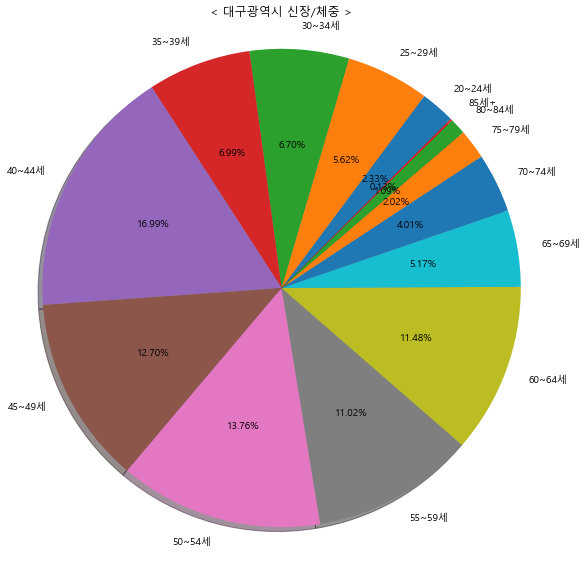

In [15]:
plt.figure(figsize=(15, 10), facecolor='white')
plt.pie(pop_count['대구광역시'], labels=pop_count['대구광역시'].index, radius=1.1, shadow=True, autopct='%.2f%%', startangle=45)
plt.title('< 대구광역시 신장/체중 >', x=0.5, y=0.99)

Text(0.5, 0.99, '< 인천광역시 신장/체중 >')

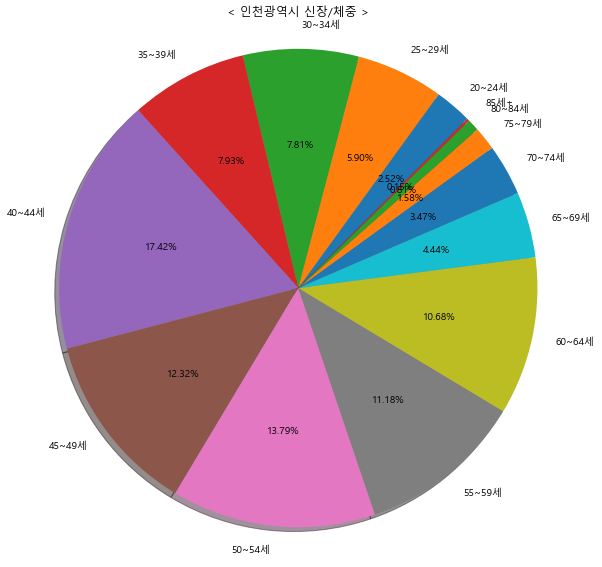

In [16]:
plt.figure(figsize=(15, 10), facecolor='white')
plt.pie(pop_count['인천광역시'], labels=pop_count['인천광역시'].index, radius=1.1, shadow=True, autopct='%.2f%%', startangle=45)
plt.title('< 인천광역시 신장/체중 >', x=0.5, y=0.99)

Text(0.5, 0.99, '< 광주광역시 신장/체중 >')

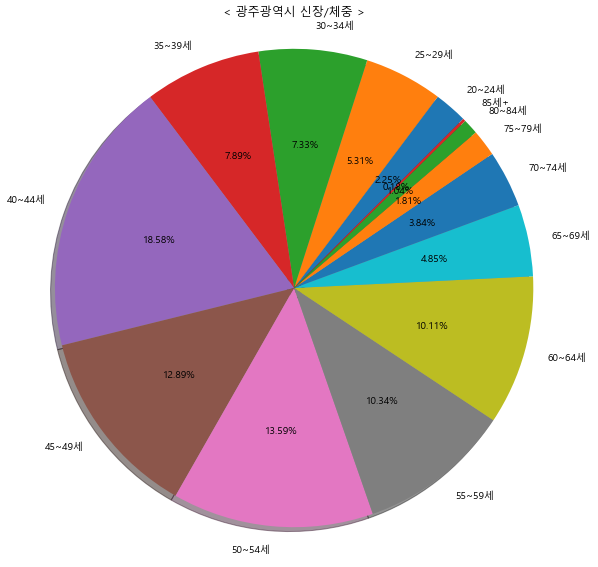

In [17]:
plt.figure(figsize=(15, 10), facecolor='white')
plt.pie(pop_count['광주광역시'], labels=pop_count['광주광역시'].index, radius=1.1, shadow=True, autopct='%.2f%%', startangle=45)
plt.title('< 광주광역시 신장/체중 >', x=0.5, y=0.99)

Text(0.5, 0.99, '< 대전광역시 신장/체중 >')

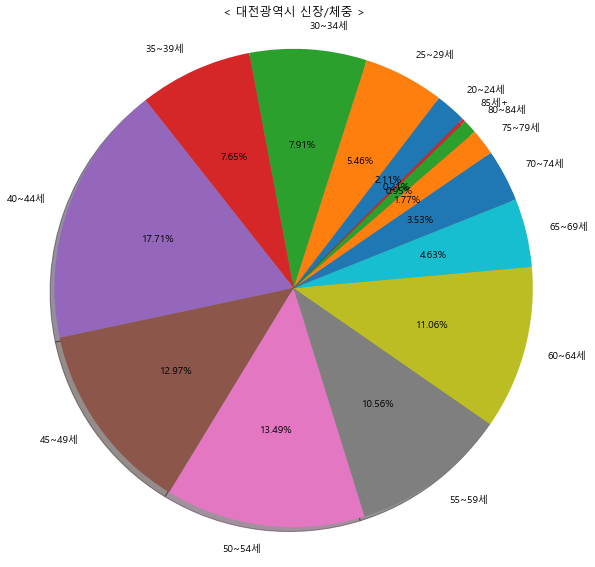

In [18]:
plt.figure(figsize=(15, 10), facecolor='white')
plt.pie(pop_count['대전광역시'], labels=pop_count['대전광역시'].index, radius=1.1, shadow=True, autopct='%.2f%%', startangle=45)
plt.title('< 대전광역시 신장/체중 >', x=0.5, y=0.99)

Text(0.5, 0.99, '< 울산광역시 신장/체중 >')

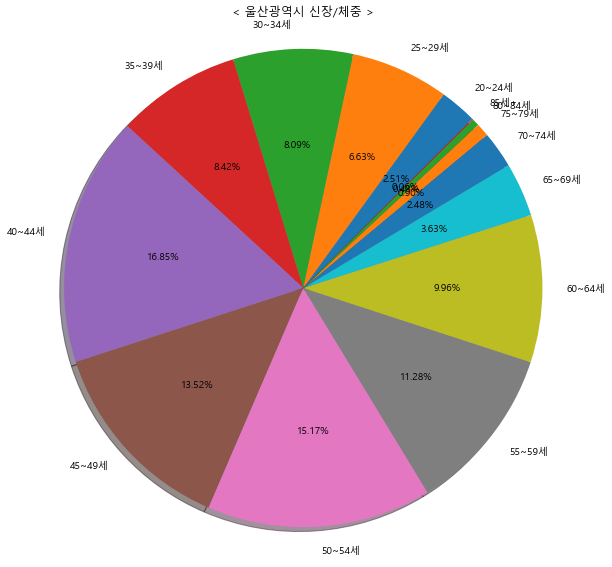

In [19]:
plt.figure(figsize=(15, 10), facecolor='white')
plt.pie(pop_count['울산광역시'], labels=pop_count['울산광역시'].index, radius=1.1, shadow=True, autopct='%.2f%%', startangle=45)
plt.title('< 울산광역시 신장/체중 >', x=0.5, y=0.99)

Text(0.5, 0.99, '< 세종특별자치시 신장/체중 >')

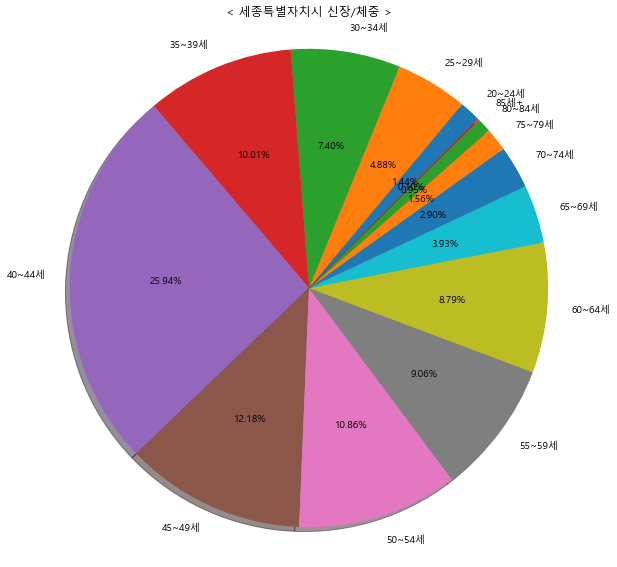

In [20]:
plt.figure(figsize=(15, 10), facecolor='white')
plt.pie(pop_count['세종시'], labels=pop_count['세종시'].index, radius=1.1, shadow=True, autopct='%.2f%%', startangle=45)
plt.title('< 세종특별자치시 신장/체중 >', x=0.5, y=0.99)

Text(0.5, 0.99, '< 경기도 신장/체중 >')

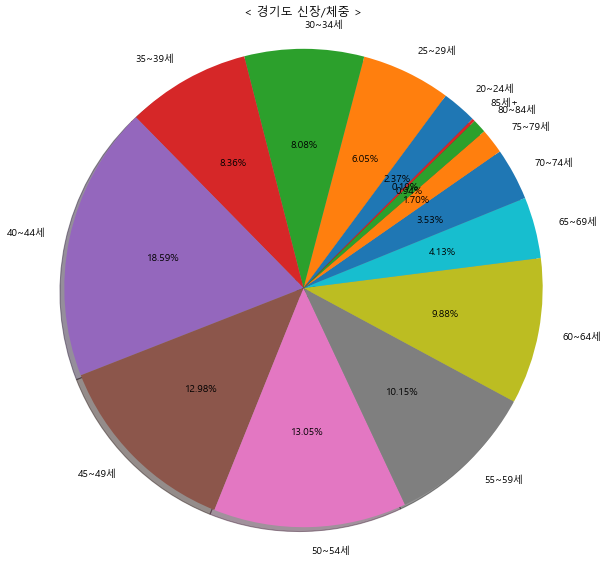

In [21]:
plt.figure(figsize=(15, 10), facecolor='white')
plt.pie(pop_count['경기도'], labels=pop_count['경기도'].index, radius=1.1, shadow=True, autopct='%.2f%%', startangle=45)
plt.title('< 경기도 신장/체중 >', x=0.5, y=0.99)

Text(0.5, 0.99, '< 강원도 신장/체중 >')

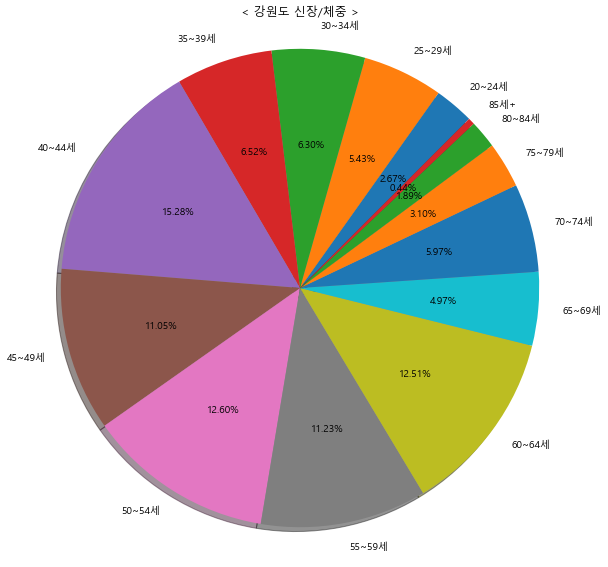

In [22]:
plt.figure(figsize=(15, 10), facecolor='white')
plt.pie(pop_count['강원도'], labels=pop_count['강원도'].index, radius=1.1, shadow=True, autopct='%.2f%%', startangle=45)
plt.title('< 강원도 신장/체중 >', x=0.5, y=0.99)

Text(0.5, 0.99, '< 충청북도 신장/체중 >')

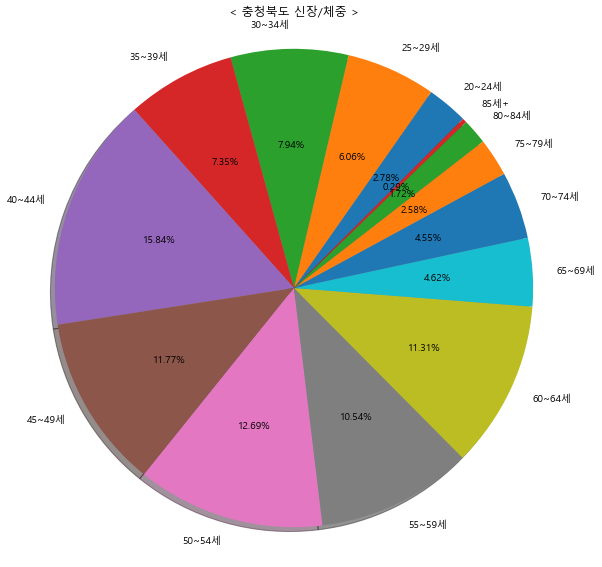

In [23]:
plt.figure(figsize=(15, 10), facecolor='white')
plt.pie(pop_count['충청북도'], labels=pop_count['충청북도'].index, radius=1.1, shadow=True, autopct='%.2f%%', startangle=45)
plt.title('< 충청북도 신장/체중 >', x=0.5, y=0.99)

Text(0.5, 0.99, '< 충청남도 신장/체중 >')

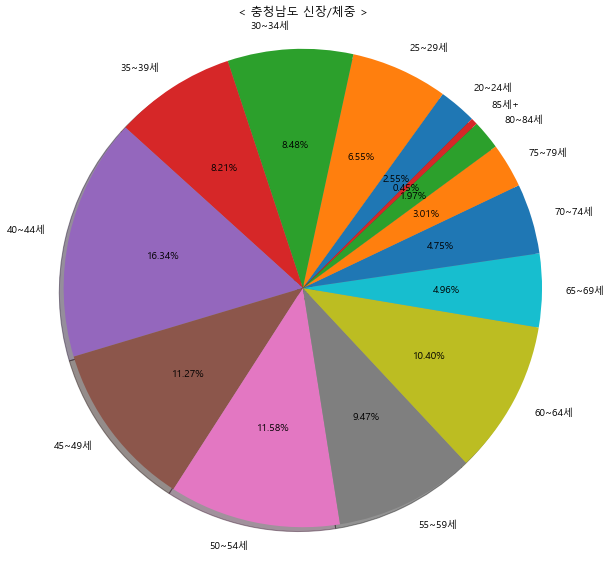

In [24]:
plt.figure(figsize=(15, 10), facecolor='white')
plt.pie(pop_count['충청남도'], labels=pop_count['충청남도'].index, radius=1.1, shadow=True, autopct='%.2f%%', startangle=45)
plt.title('< 충청남도 신장/체중 >', x=0.5, y=0.99)

Text(0.5, 0.99, '< 전라북도 신장/체중 >')

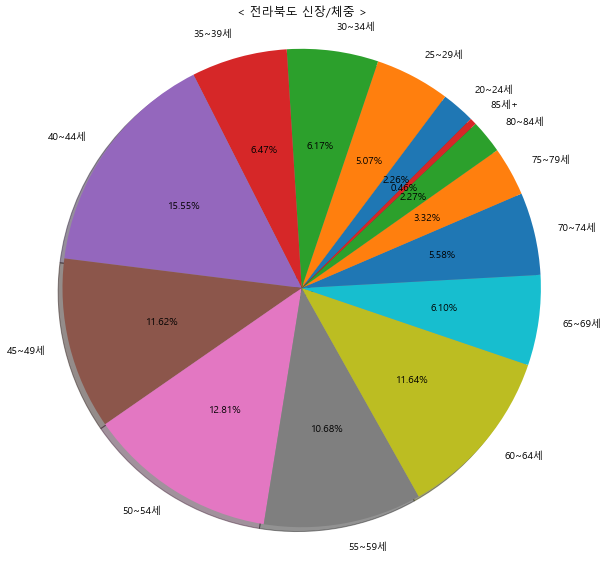

In [25]:
plt.figure(figsize=(15, 10), facecolor='white')
plt.pie(pop_count['전라북도'], labels=pop_count['전라북도'].index, radius=1.1, shadow=True, autopct='%.2f%%', startangle=45)
plt.title('< 전라북도 신장/체중 >', x=0.5, y=0.99)

Text(0.5, 0.99, '< 전라남도 신장/체중 >')

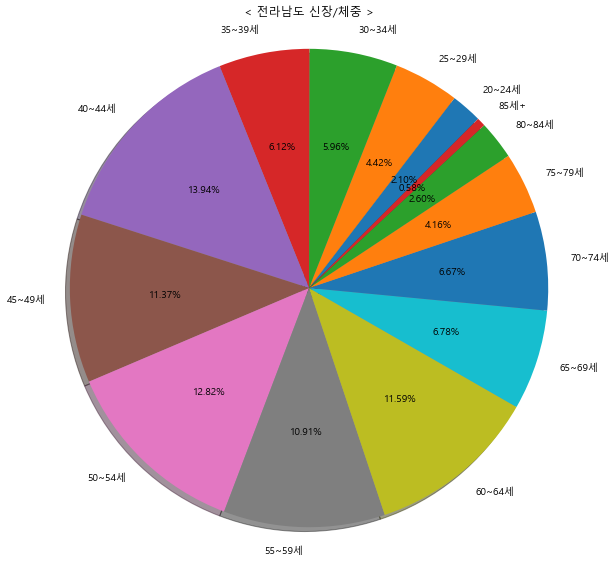

In [26]:
plt.figure(figsize=(15, 10), facecolor='white')
plt.pie(pop_count['전라남도'], labels=pop_count['전라남도'].index, radius=1.1, shadow=True, autopct='%.2f%%', startangle=45)
plt.title('< 전라남도 신장/체중 >', x=0.5, y=0.99)

Text(0.5, 0.99, '< 경상북도 신장/체중 >')

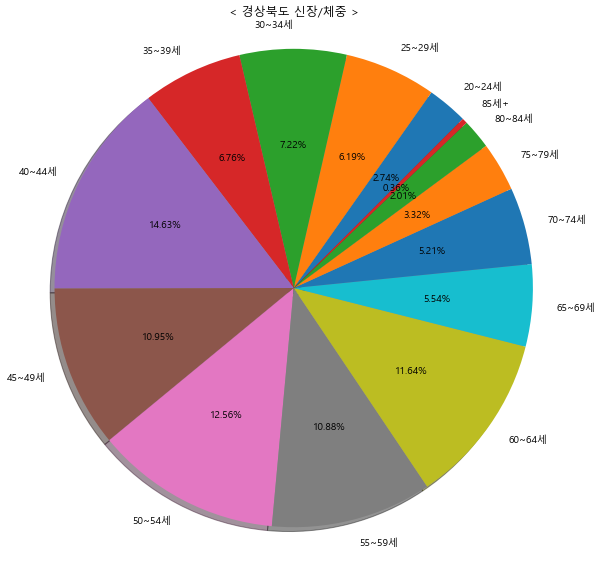

In [27]:
plt.figure(figsize=(15, 10), facecolor='white')
plt.pie(pop_count['경상북도'], labels=pop_count['경상북도'].index, radius=1.1, shadow=True, autopct='%.2f%%', startangle=45)
plt.title('< 경상북도 신장/체중 >', x=0.5, y=0.99)

Text(0.5, 0.99, '< 경상남도 신장/체중 >')

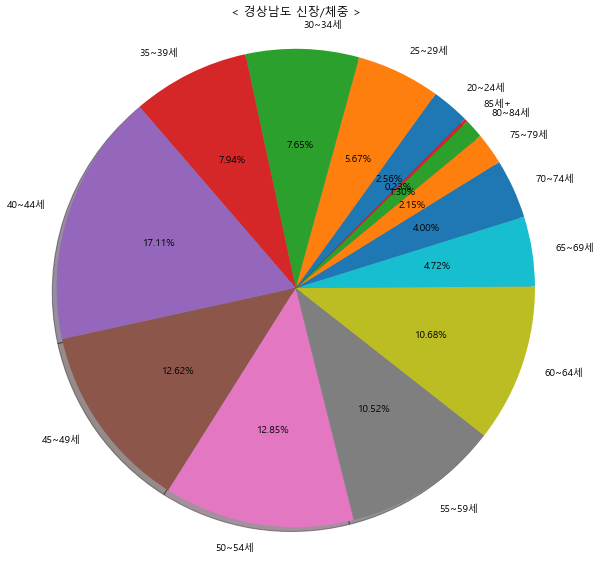

In [28]:
plt.figure(figsize=(15, 10), facecolor='white')
plt.pie(pop_count['경상남도'], labels=pop_count['경상남도'].index, radius=1.1, shadow=True, autopct='%.2f%%', startangle=45)
plt.title('< 경상남도 신장/체중 >', x=0.5, y=0.99)

Text(0.5, 0.99, '< 제주도 신장/체중 >')

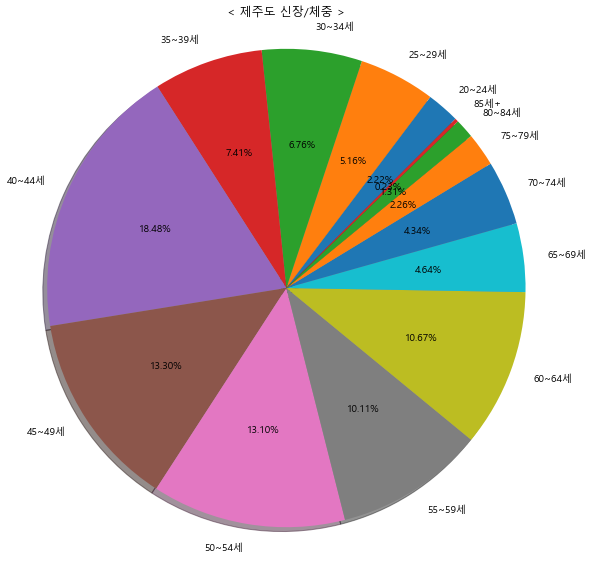

In [29]:
plt.figure(figsize=(15, 10), facecolor='white')
plt.pie(pop_count['제주도'], labels=pop_count['제주도'].index, radius=1.1, shadow=True, autopct='%.2f%%', startangle=45)
plt.title('< 제주도 신장/체중 >', x=0.5, y=0.99)